# Test demo

In [1]:
# general
import os
import glob
import numpy as np
import scipy.ndimage

# io and plot
import surfa as sf
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
def show_3d_mid(load_train_img_np, cmap="gray", title = ''):
    def show_slices(slices, cmap):
       """ Function to display row of image slices """
       fig, axes = plt.subplots(1, len(slices))
       for i, slice in enumerate(slices):
           axes[i].imshow(slice, cmap=cmap) #, origin="lower"
           if isinstance(cmap, str) == False:
               from matplotlib.pyplot import pcolormesh
               axes[i].pcolormesh(slice, cmap=cmap, rasterized=True, vmin=0, vmax=255)
           if i==1:
               axes[i].set_title(title)

    H,W,C = load_train_img_np.shape
    slice_0 = load_train_img_np[int(H/2), :, :]
    slice_1 = load_train_img_np[:,int(W/2), :]
    slice_2 = load_train_img_np[:, :, int(C/2)]
    show_slices([slice_0, slice_1, slice_2], cmap)
    plt.tight_layout()
    plt.show()
    
def conform(f):
    out = sf.load_volume(f)
    print(f'Shape={out.shape}, in orientation {out.geom.orientation}, voxelsize={out.geom.voxsize}, dtype = {out.dtype}, range = [{out.min()},{out.max()}]')

## Test keymorph (half res models)
- on example data

Shape=(256, 256, 256), in orientation LPS, voxelsize=[1. 1. 1.], dtype = float64, range = [0.0,0.9789349436759949]
Shape=(256, 256, 256), in orientation LPS, voxelsize=[1. 1. 1.], dtype = float64, range = [0.0,1.0]
Shape=(256, 256, 256), in orientation LPS, voxelsize=[1. 1. 1.], dtype = float64, range = [0.0,13.0]
Shape=(256, 256, 256), in orientation LPS, voxelsize=[1. 1. 1.], dtype = float64, range = [0.0,13.0]
Label class = 14


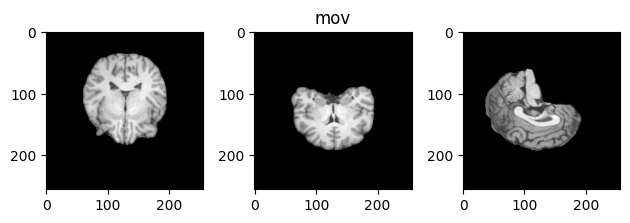

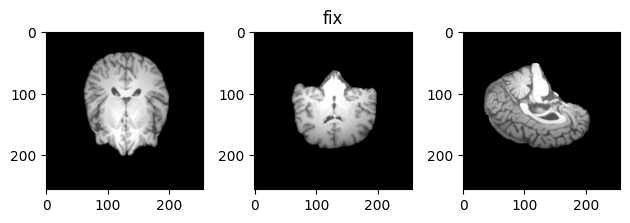

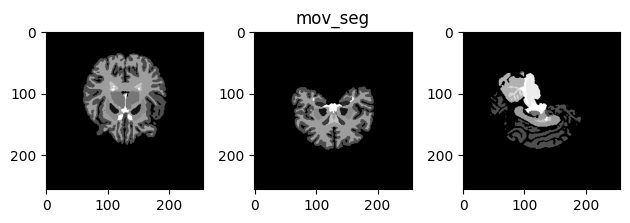

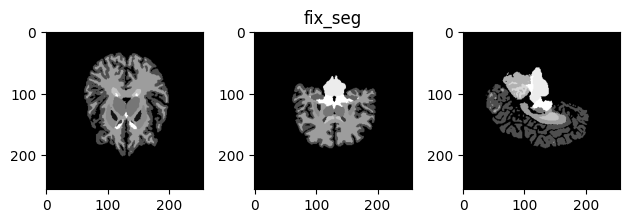

In [3]:
moving_path = './example_data_half/img_m/IXI_001_128x128x128.nii.gz'
fixed_path = './example_data_half/img_m/IXI_002_128x128x128.nii.gz'
moving_seg_path = './example_data_half/seg_m/IXI_001_128x128x128.nii.gz'
fixed_seg_path = './example_data_half/seg_m/IXI_002_128x128x128.nii.gz'
conform(moving_path)
conform(fixed_path)
conform(moving_seg_path)
conform(fixed_seg_path)

# Load.
mov = nib.load(moving_path).get_fdata()
fix = nib.load(fixed_path).get_fdata()
mov_seg = nib.load(moving_seg_path).get_fdata()
fix_seg = nib.load(fixed_seg_path).get_fdata()
print(f'Label class = {len(np.unique(mov_seg))}')

# Visualization
show_3d_mid(mov, cmap='gray', title='mov')
show_3d_mid(fix, cmap='gray', title='fix')
show_3d_mid(mov_seg, cmap='gray', title='mov_seg')
show_3d_mid(fix_seg, cmap='gray', title='fix_seg')

img_a: (1, 128, 128, 128)


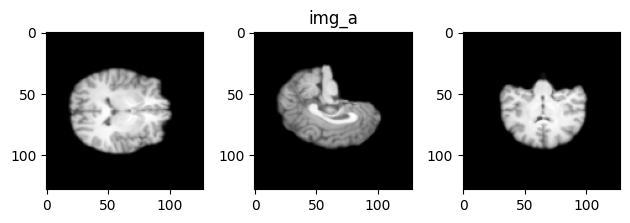

img_f: (1, 128, 128, 128)


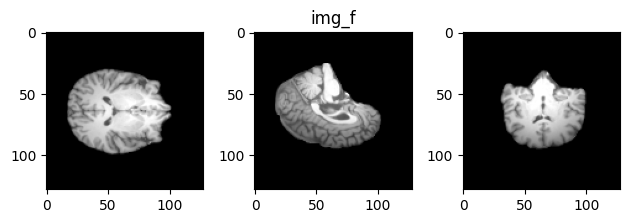

img_m: (1, 128, 128, 128)


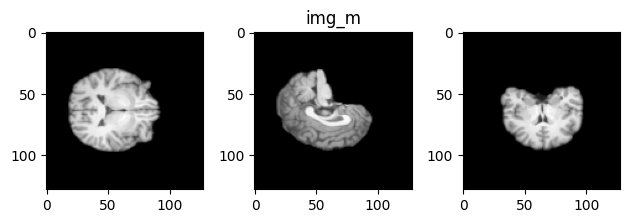

In [42]:
# Check results.
folder_path = "./register_output/eval/['IXI_002_128x128x128']_['IXI_001_128x128x128']"
 
img_npys = sorted([i for i in os.listdir(folder_path) if i.startswith("img")])

data = {}
for file in img_npys:
    file_name = file[:5]
    data[file_name] = np.load(f'{folder_path}/{file}')
    print(f'{file_name}: {data[file_name].shape}')
    show_3d_mid(data[file_name].squeeze(), cmap='gray', title= file_name)

- on on of my data

Shape=(256, 256, 256), in orientation LIA, voxelsize=[1. 1. 1.], dtype = uint8, range = [0,227]
Shape=(256, 256, 256), in orientation LIA, voxelsize=[1.         0.99999994 0.99999988], dtype = uint8, range = [0,223]
Shape=(256, 256, 256), in orientation LIA, voxelsize=[1. 1. 1.], dtype = int32, range = [0,60]
Shape=(256, 256, 256), in orientation LIA, voxelsize=[1.         0.99999994 0.99999988], dtype = int32, range = [0,60]
Label class = 33


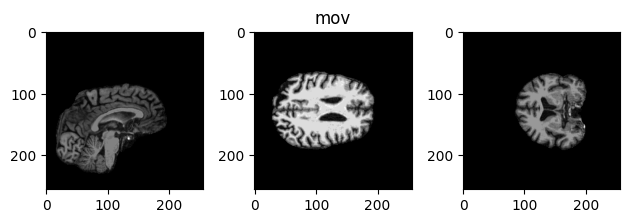

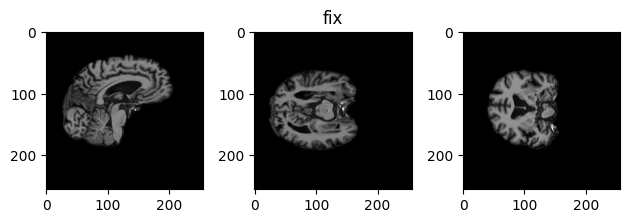

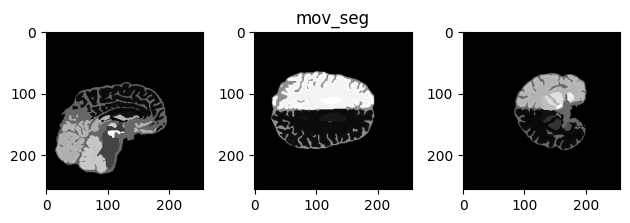

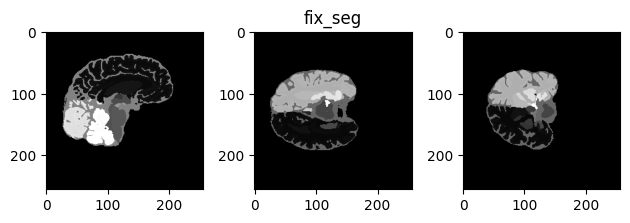

In [3]:
# Test using my data.
moving_path = '/autofs/space/bal_004/users/jf1212/code/affine_synthmorph/data/eval/adni-3t/0689/brainmask_m00.nii.gz'
fixed_path = '/autofs/space/bal_004/users/jf1212/code/affine_synthmorph/data/eval/adni-3t/0689/brainmask_m24.nii.gz'
moving_seg_path = '/autofs/space/bal_004/users/jf1212/code/affine_synthmorph/data/eval/adni-3t/0689/synthseg_brainmask_m00.nii.gz'
fixed_seg_path = '/autofs/space/bal_004/users/jf1212/code/affine_synthmorph/data/eval/adni-3t/0689/synthseg_brainmask_m24.nii.gz'
conform(moving_path)
conform(fixed_path)
conform(moving_seg_path)
conform(fixed_seg_path)

# Load.
mov = nib.load(moving_path).get_fdata()
fix = nib.load(fixed_path).get_fdata()
mov_seg = nib.load(moving_seg_path).get_fdata()
fix_seg = nib.load(fixed_seg_path).get_fdata()
print(f'Label class = {len(np.unique(mov_seg))}')

# Visualization
show_3d_mid(mov, cmap='gray', title='mov')
show_3d_mid(fix, cmap='gray', title='fix')
show_3d_mid(mov_seg, cmap='gray', title='mov_seg')
show_3d_mid(fix_seg, cmap='gray', title='fix_seg')

- IMPORTANT: Do not rerun the following cells, since I deleted results folders.

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-affine.npy: (1, 128, 128, 128)


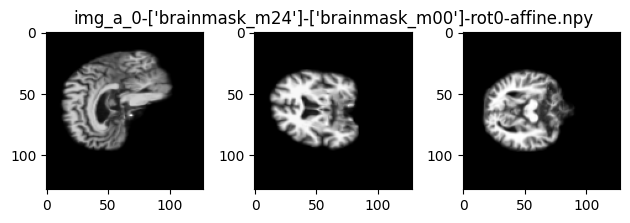

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-rigid.npy: (1, 128, 128, 128)


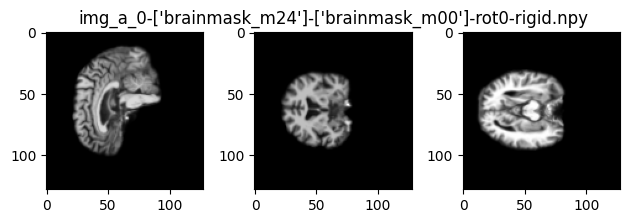

img_f_0-['brainmask_m24'].npy: (1, 128, 128, 128)


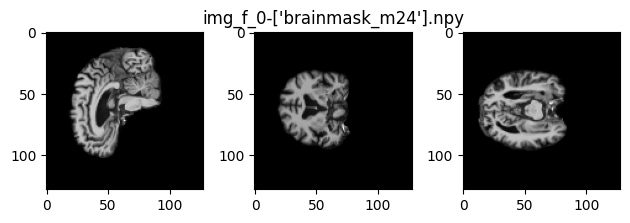

img_m_0-['brainmask_m00']-rot0.npy: (1, 128, 128, 128)


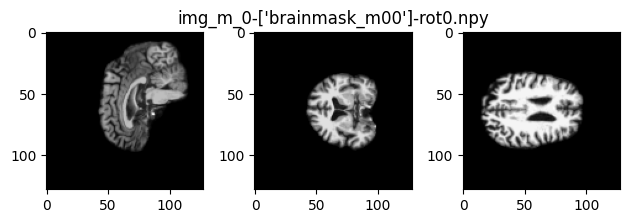

In [14]:
# Check results.
# Using weights: numkey128_aff_msekpconsistency.1250.h5
folder_path = "./register_output/eval/['brainmask_m24']_['brainmask_m00']_128kpcon"
 
img_npys = sorted([i for i in os.listdir(folder_path) if i.startswith("img")])

data = {}
for file in img_npys:
    file_name = file # f'{file[:5]}'
    data[file_name] = np.load(f'{folder_path}/{file}')
    print(f'{file_name}: {data[file_name].shape}')
    show_3d_mid(data[file_name].squeeze(), cmap='gray', title= file_name)

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-affine.npy: (1, 128, 128, 128)


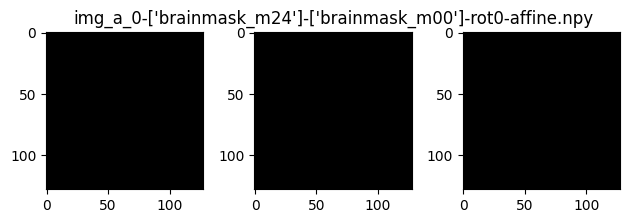

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-rigid.npy: (1, 128, 128, 128)


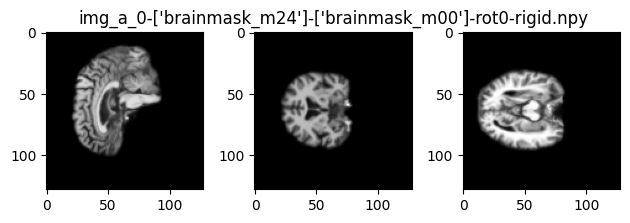

img_f_0-['brainmask_m24'].npy: (1, 128, 128, 128)


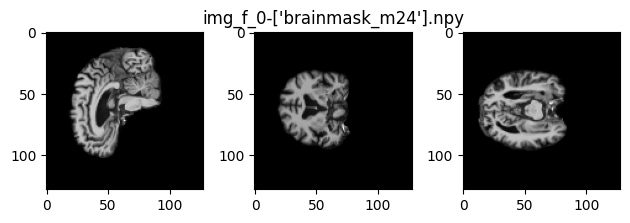

img_m_0-['brainmask_m00']-rot0.npy: (1, 128, 128, 128)


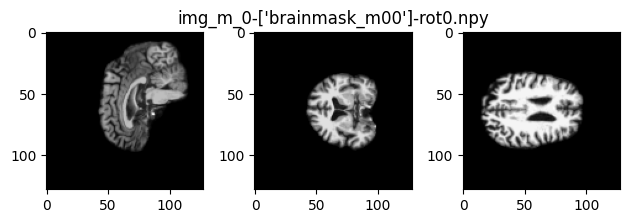

In [15]:
# Using weights: numkey128_aff_msekpconsistency.1250.h5 and realworld
folder_path = "./register_output/eval/['brainmask_m24']_['brainmask_m00']_128kpcon_realworld"
 
img_npys = sorted([i for i in os.listdir(folder_path) if i.startswith("img")])

data = {}
for file in img_npys:
    file_name = file # f'{file[:5]}'
    data[file_name] = np.load(f'{folder_path}/{file}')
    print(f'{file_name}: {data[file_name].shape}')
    show_3d_mid(data[file_name].squeeze(), cmap='gray', title= file_name)

### Different orientations lead to different registration performances:
- permute (0, 1, 3, 2): affine harddice ~0.52
- as input: affine harddice ~0.65
- transfer to RAS: affine harddice ~0.61

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-affine.npy: (1, 128, 128, 128)


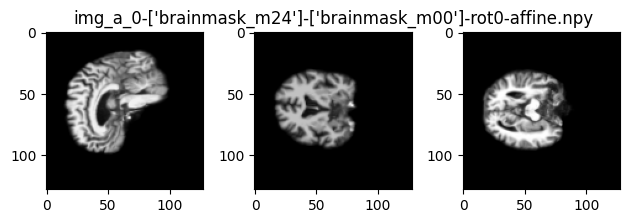

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-rigid.npy: (1, 128, 128, 128)


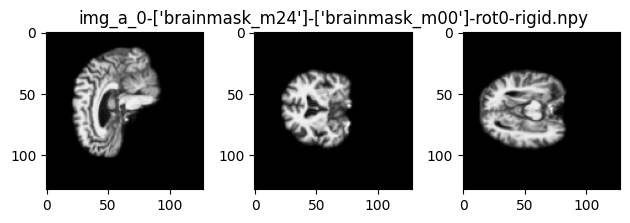

img_f_0-['brainmask_m24'].npy: (1, 128, 128, 128)


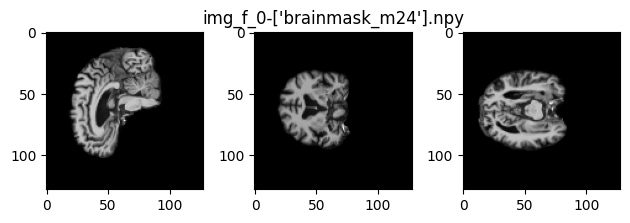

img_m_0-['brainmask_m00']-rot0.npy: (1, 128, 128, 128)


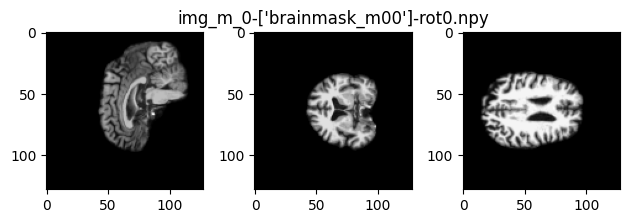

In [17]:
# Using: numkey128_aff_dice.1560.h5
folder_path = "./register_output/eval/['brainmask_m24']_['brainmask_m00']_128dice"
 
img_npys = sorted([i for i in os.listdir(folder_path) if i.startswith("img")])

data = {}
for file in img_npys:
    file_name = file # f'{file[:5]}'
    data[file_name] = np.load(f'{folder_path}/{file}')
    print(f'{file_name}: {data[file_name].shape}')
    show_3d_mid(data[file_name].squeeze(), cmap='gray', title= file_name)

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-affine.npy: (1, 128, 128, 128)


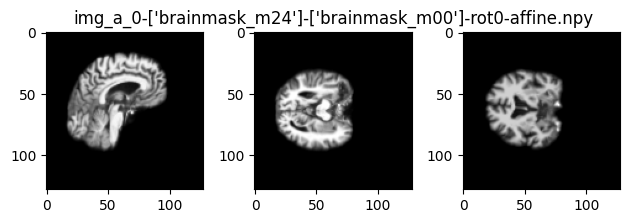

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-rigid.npy: (1, 128, 128, 128)


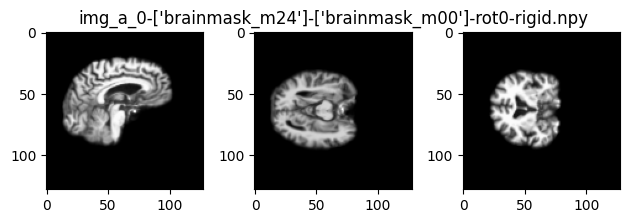

img_f_0-['brainmask_m24'].npy: (1, 128, 128, 128)


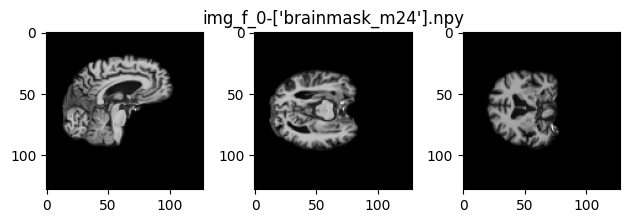

img_m_0-['brainmask_m00']-rot0.npy: (1, 128, 128, 128)


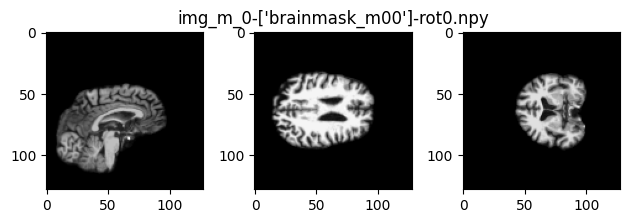

In [5]:
# Using: numkey128_aff_dice.1560.h5 but remove permute(0, 1, 3, 2)
folder_path = "./register_output/eval/['brainmask_m24']_['brainmask_m00']_nopermute"
 
img_npys = sorted([i for i in os.listdir(folder_path) if i.startswith("img")])

data = {}
for file in img_npys:
    file_name = file # f'{file[:5]}'
    data[file_name] = np.load(f'{folder_path}/{file}')
    print(f'{file_name}: {data[file_name].shape}')
    show_3d_mid(data[file_name].squeeze(), cmap='gray', title= file_name)

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-affine.npy: (1, 128, 128, 128)


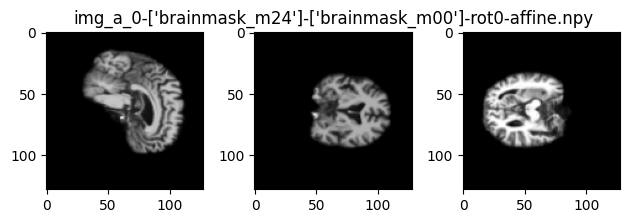

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-rigid.npy: (1, 128, 128, 128)


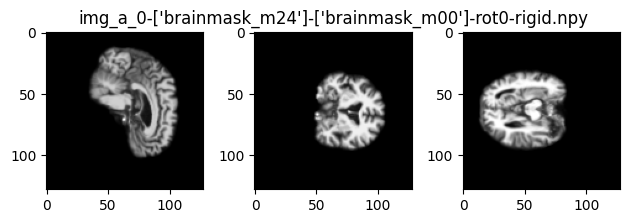

img_f_0-['brainmask_m24'].npy: (1, 128, 128, 128)


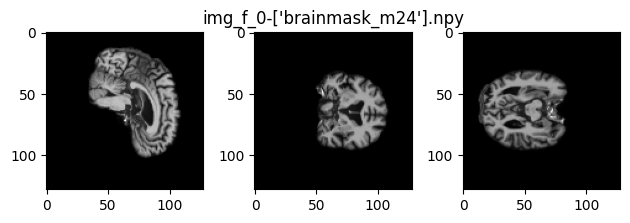

img_m_0-['brainmask_m00']-rot0.npy: (1, 128, 128, 128)


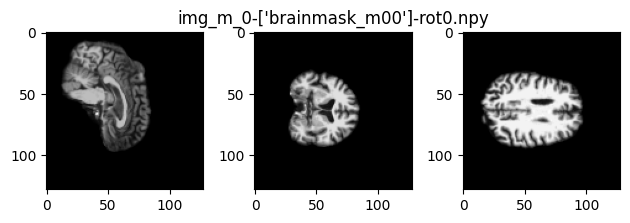

In [6]:
# Using: numkey128_aff_dice.1560.h5 but convert to RAS space
folder_path = "./register_output/eval/['brainmask_m24']_['brainmask_m00']_RAS"
 
img_npys = sorted([i for i in os.listdir(folder_path) if i.startswith("img")])

data = {}
for file in img_npys:
    file_name = file # f'{file[:5]}'
    data[file_name] = np.load(f'{folder_path}/{file}')
    print(f'{file_name}: {data[file_name].shape}')
    show_3d_mid(data[file_name].squeeze(), cmap='gray', title= file_name)

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-affine.npy: (1, 128, 128, 128)


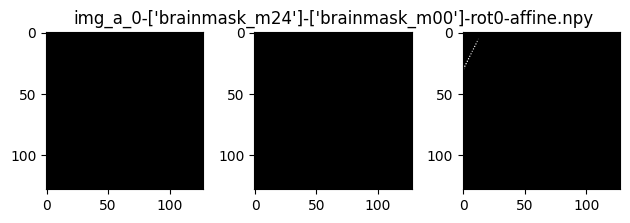

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-rigid.npy: (1, 128, 128, 128)


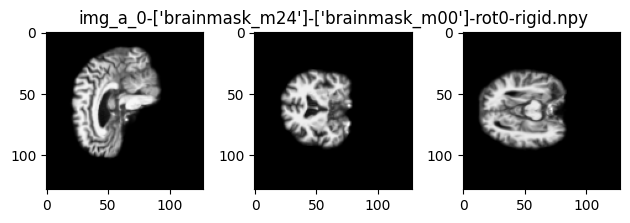

img_f_0-['brainmask_m24'].npy: (1, 128, 128, 128)


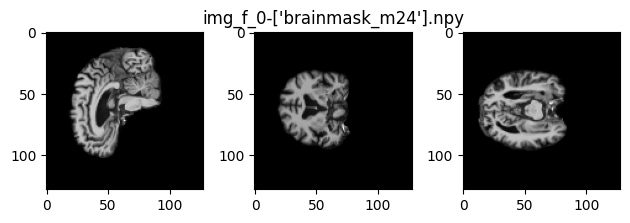

img_m_0-['brainmask_m00']-rot0.npy: (1, 128, 128, 128)


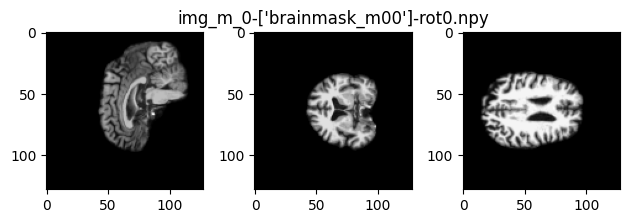

In [16]:
# Using: numkey128_aff_dice.1560.h5 and --align_keypoints_in_real_world_coords
folder_path = "./register_output/eval/['brainmask_m24']_['brainmask_m00']_128dice_realworld"
 
img_npys = sorted([i for i in os.listdir(folder_path) if i.startswith("img")])

data = {}
for file in img_npys:
    file_name = file # f'{file[:5]}'
    data[file_name] = np.load(f'{folder_path}/{file}')
    print(f'{file_name}: {data[file_name].shape}')
    show_3d_mid(data[file_name].squeeze(), cmap='gray', title= file_name)

## Test BrainMorph
- 128+4lv: affine harddice 0.735383927822113
- 256+6lv: affine harddice 0.8379181772470474

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-affine.npy: (1, 256, 256, 256)


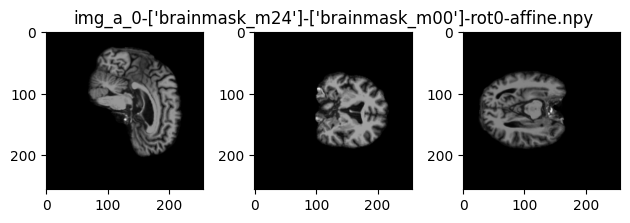

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-rigid.npy: (1, 256, 256, 256)


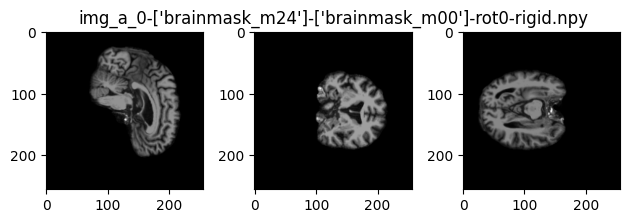

img_f_0-['brainmask_m24'].npy: (1, 256, 256, 256)


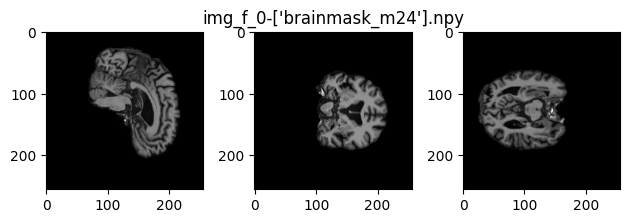

img_m_0-['brainmask_m00']-rot0.npy: (1, 256, 256, 256)


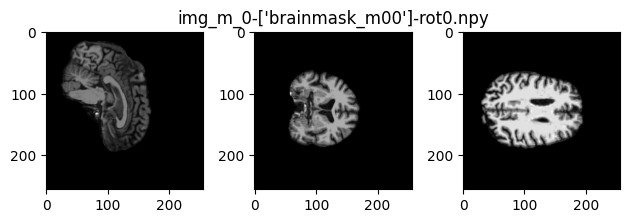

In [5]:
# Using: full resolution foundation model 128kp 4lv
folder_path = "./register_output/eval/['brainmask_m24']_['brainmask_m00']_128kp_4lv"
 
img_npys = sorted([i for i in os.listdir(folder_path) if i.startswith("img")])

data = {}
for file in img_npys:
    file_name = file # f'{file[:5]}'
    data[file_name] = np.load(f'{folder_path}/{file}')
    print(f'{file_name}: {data[file_name].shape}')
    show_3d_mid(data[file_name].squeeze(), cmap='gray', title= file_name)

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-affine.npy: (1, 256, 256, 256)


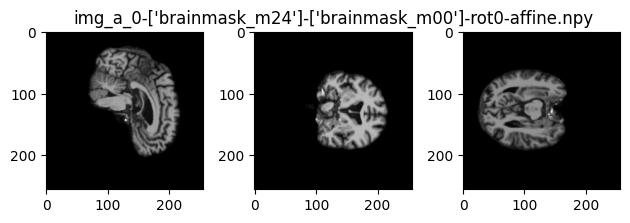

img_a_0-['brainmask_m24']-['brainmask_m00']-rot0-rigid.npy: (1, 256, 256, 256)


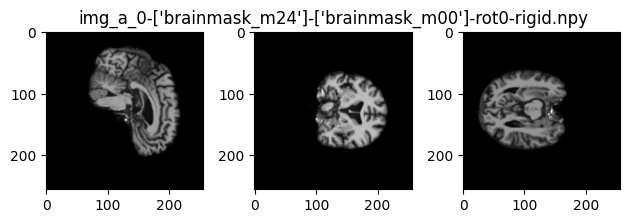

img_f_0-['brainmask_m24'].npy: (1, 256, 256, 256)


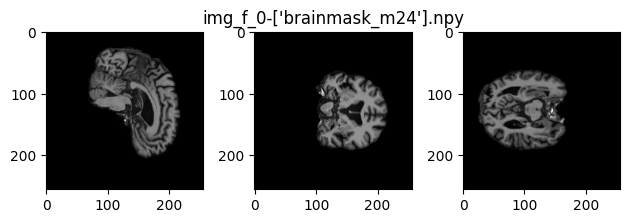

img_m_0-['brainmask_m00']-rot0.npy: (1, 256, 256, 256)


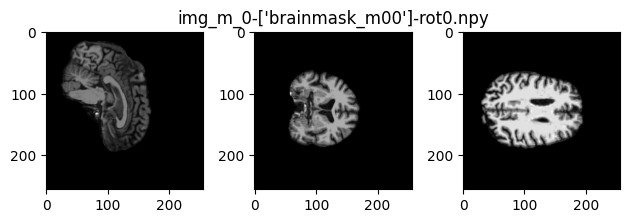

In [4]:
# Using: full resolution foundation model 256kp 6lv (Best presented in paper)
folder_path = "./register_output/eval/['brainmask_m24']_['brainmask_m00']_256kp_6lv"
 
img_npys = sorted([i for i in os.listdir(folder_path) if i.startswith("img")])

data = {}
for file in img_npys:
    file_name = file # f'{file[:5]}'
    data[file_name] = np.load(f'{folder_path}/{file}')
    print(f'{file_name}: {data[file_name].shape}')
    show_3d_mid(data[file_name].squeeze(), cmap='gray', title= file_name)

- How to get the matrix? -> saved in results ["matrix"]
- Which interpolation did they use? -> in utils.align_img, using bilinear
- Which configuration should be used for fair comparison? -> In the paper, they presented using 256 as the best for affine.